Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
#loading the csv data to pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
#print first five rows in the DataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#print last five rows of DataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation
1.Positive Correlation
2.Negative Correlation

In [10]:
correlation = gold_data.corr()

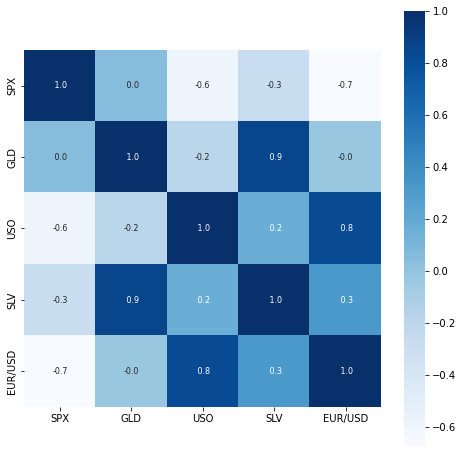

In [14]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt=' .1f', annot=True, annot_kws={'size' :8}, cmap='Blues')

In [17]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


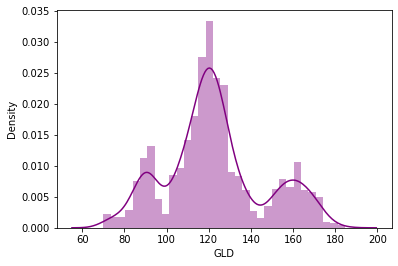

In [20]:
#checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='purple')

Splitting the features and Target


In [21]:
X = gold_data.drop(['Date', 'GLD'],axis=1)
Y=gold_data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training Data and Test Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=2)

Model Training using Random Forest Regressor

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [29]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.61759935  82.15359948 116.30020022 127.63500093 120.78010076
 154.76049757 150.30919838 126.15330005 117.35459874 125.94310088
 116.23180134 171.39950074 141.32969808 168.18259856 115.24309997
 117.64390028 139.67980332 170.09610053 159.42340267 160.08529896
 155.23260015 125.28510013 176.76309896 157.39170365 125.17880031
  93.88979987  77.27830015 120.2497997  119.14749944 167.47510041
  88.1696005  125.11940028  91.21930076 117.73240007 121.07919883
 136.59420049 115.63730125 115.05760082 147.11089914 107.13450087
 104.51190252  87.1362977  126.49280041 117.77110021 152.93439882
 119.51130032 108.4374996  108.13439849  93.16960054 127.08159797
  74.81520021 113.68009933 121.49930019 111.2970992  118.91909915
 120.82869942 158.45830055 168.36500152 147.06059676  85.654298
  94.35380073  86.77839895  90.79160049 118.89400099 126.49900054
 127.4657003  170.03299967 122.27469941 117.27299898  98.57040025
 166.99140153 143.2071984  132.01460187 121.16910223 120.72549937
 119.7450005

In [31]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.9890817091839793


Compare the actual values and predicted values in a Plot

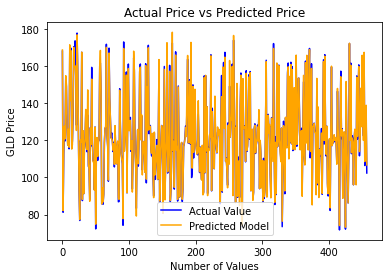

In [35]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction,color='orange', label = 'Predicted Model')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [33]:
Y_test = list(Y_test)
